# Basic Image Processing with ```OpenCV```

In this session, we'll be looking at how to explore the different colour channels that comprise an image.

By the end of this class, you'll be able to extract colour histograms from images and qualitatively compare the results.

In [4]:
# We need to include the home directory in our path, so we can read in our own module.
import os

# image processing tools
import cv2
import numpy as np

# utility functions for this course
import sys
sys.path.append(os.path.join(".."))
from utils.imutils import jimshow
from utils.imutils import jimshow_channel

# plotting tool
import matplotlib.pyplot as plt

## Loading an image

We'll start by loading an image to work with - we're going to use the image in [data/img](../data/img/) called ```terasse.jpeg```.

In [5]:
# define filepath
filename = os.path.join("..", "data", "img", "terasse.jpeg")

In [6]:
# load image
image = cv2.imread(filename)

In [7]:
# print the shape of this image
image.shape

(1576, 1200, 3)

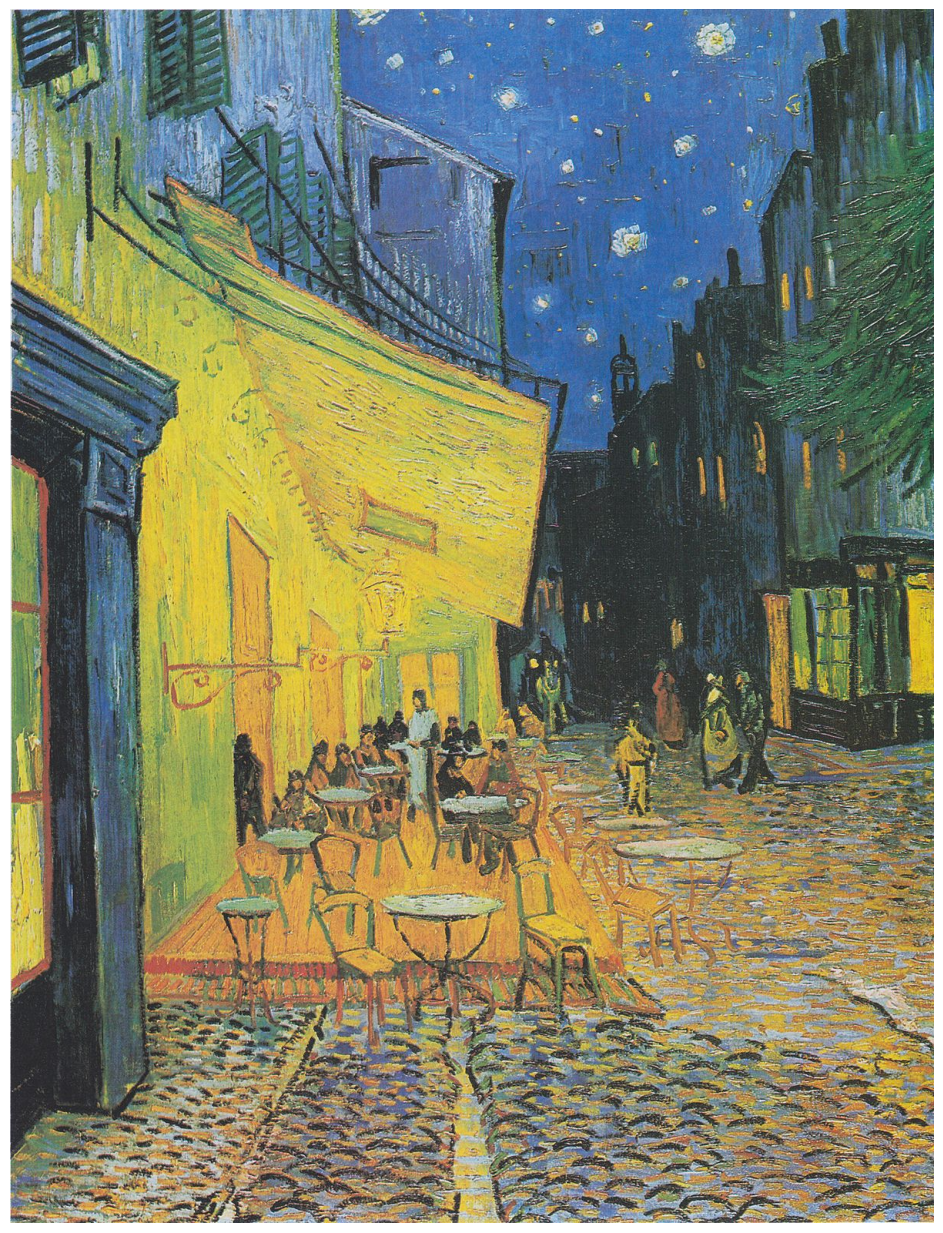

In [8]:
# display the image
jimshow(image)

## Splitting channels

We saw last week and in the lecture today how images are represented digitally as 3-dimensional ```numpy``` arrays. These 3-dimensions are ```heigh```, ```width```, and ```colour channels```.

We're working primarily with RGB colour models in the course. But rememember that ```OpenCV``` represents these as BGR!

In [ ]:
# split the image into seperate colour channels called B, G, R
(B, G, R) = cv2.split(image)

In [ ]:
# use the jimshow_channel function to display individual channels
jimshow_channel(R, "Red")

You'll notice here that the displayed image is entirely greyscale here. 

**Question:** In your groups, can you explain why this is the case?

## Showing channels in colour

If we want to display the individual colour channels using their "real" colours, we need to make a little bit of a workaround. 

Essentially, we have to manually set all of the pixels on the other channels to zero.

__Creating an empty ```numpy``` array__

In [ ]:
# create an array of zeroes
zeros = np.zeros(image.shape[:2], dtype = "uint8")

We then use this array to create an artificial image comprising the colour channel we want to see, with all zeroes on the other channels.

In [ ]:
# show only blue
jimshow(cv2.merge([zeros, zeros, B]))

In [ ]:
# show only green
jimshow(cv2.merge([zeros, G, zeros]))

In [ ]:
# show only red
jimshow(cv2.merge([zeros, zeros, R]))

## Histograms

In order to create a 1D (greyscale) histogram, we first need to manually convert the image to greyscale.

We can do this in open CV using the function ```cv2.cvtColor()```.

In [ ]:
# converting to greyscale
greyed_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

__A note on ```COLOR_BRG2GRAY```__

In [ ]:
jimshow_channel(greyed_image, "Greyscale")

## A quick greyscale histogram using ```matplotlib```

We're going to learn two things here: 1) how to use the Python plotting library ```matplotlib```; 2) how to create quick greyscale histograms.

In [ ]:
# plotting with matplotlib
# Create figure
plt.figure()
# Add histogram
plt.hist(image.flatten(), 256, [0,256])
# Plot title
plt.title("Greyscale histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.show()

## Plotting color histograms

```OpenCV``` has a built in tool for extraction histograms for specific colour channels. Unfortunately, the syntax is quite confusing! If you look at the documentation, you'll see something like this:

```cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])```

But we can unpack this a little in the following way:

- images : it is the source image of type uint8 or float32 represented as “[img]”.
- channels : it is the index of channel for which we calculate histogram. 
    - For grayscale image, its value is [0] and
    - color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
- mask : mask image. To find histogram of full image, it is given as “None”.
- histSize : this represents our BIN count. For full scale, we pass [256].
- ranges : this is our RANGE. Normally, it is [0,256].

__Plot only blue__

In [ ]:
hist = cv2.calcHist([image], [0], None, [256], [0,256])
plt.plot(hist, color="Blue")

__Plot only green__

In [ ]:
hist = cv2.calcHist([image], [1], None, [256], [0,256])
plt.plot(hist, color="Green")

__Plot only red__

In [ ]:
hist = cv2.calcHist([image], [2], None, [256], [0,256])
plt.plot(hist, color="Red")

__An alternative approach__

In [ ]:
(BLUE, GREEN, RED) = cv2.split(image)

In [ ]:
hist = cv2.calcHist([RED], [0], None, [256], [0,256])
plt.plot(hist, color="r")

In [ ]:
# split channels
channels = cv2.split(image)
# names of colours
colors = ("b", "g", "r")
# create plot
plt.figure()
# add title
plt.title("Histogram")
# Add xlabel
plt.xlabel("Bins")
# Add ylabel
plt.ylabel("# of Pixels")

# for every tuple of channel, colour
for (channel, color) in zip(channels, colors):
    # Create a histogram
    hist = cv2.calcHist([channel], [0], None, [256], [0, 256])
    # Plot histogram
    plt.plot(hist, color=color)
    # Set limits of x-axis
    plt.xlim([0, 256])
# Show plot
plt.show()

## Exercise

We've now seen how to load images and split them into their separate colour channels. We've also seen how we can use this to extract colour histograms showing distributions of pixel intensities across each channel. Lastly we've seen how we can use this to plot colour histograms for any given image.

- In your groups, rework the code from today to create and save colour histograms for each of the images in the data folder.